# 10章 より実践的な前処理

# 10.1 さまざまなデータの読み込み

In [ ]:
# pandasをインポートする
import pandas as pd

## 区切り文字、文字コードを指定してファイルを読み込む  

pd.read_csv('ファイル名', **sep**='区切り文字', **encoding**='文字コード')  

**sep**  
区切り文字','、'\t'などを指定する  
**encoding**  
文字コード : 'shift-jis'、'UTF-8'などを指定する

参考箇所  
コード10-2 read_csv関数にパラメータ引数を追加する(P348)  
コード10-4 文字コードを指定する(P351)

穴埋めコード1

In [ ]:
# 区切り文字にタブ、文字コードにShift-jisを指定し、'weather2.tsv'を読み込む
df = pd.read_csv('weather2.tsv', sep = '\t', encoding = 'Shift-jis')

# ファイルの先頭5行を表示する
df.head()

,weather_id,weather
0,1,晴れ
1,2,曇り
2,3,雨


▶実行結果  
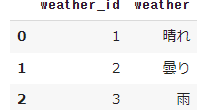

## JSONファイルを読み込む  


pd.**read_json('ファイル名')**

参考箇所  
コード10-5 JSONファイルを読み込む(P355)

穴埋めコード2

In [ ]:
# jsonファイル'temp.json'を読み込む
temp = pd.read_json('temp.json')

# ファイルの先頭2行を表示する
temp.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729
atemp,0.363625,0.353739,0.189405,0.212122,0.22927,0.233209,0.208839,0.162254,0.116175,0.150888,0.191464,0.160473,0.150883,0.188413,0.248112,0.234217,0.176771,0.232333,0.298422,0.25505,0.157833,0.07907,0.098839,0.11793,0.234526,0.2036,0.2197,0.223317,0.212126,0.250322,0.18625,0.23453,0.254417,0.177878,0.228587,0.243058,0.291671,0.303658,0.198246,0.144283,...,0.350371,0.378779,0.248742,0.257583,0.339004,0.281558,0.289762,0.298422,0.323867,None,0.359208,0.455796,0.469054,0.428012,0.258204,0.321958,0.389508,0.390146,0.435575,0.338363,0.297338,0.294188,0.294192,0.338383,0.369938,0.4015,0.409708,0.342162,0.335217,0.301767,0.236113,0.259471,0.2589,0.294465,0.220333,0.226642,0.255046,0.2424,0.2317,0.223487
dteday,2011-01-01,2011-01-02,2011-01-03,2011-01-04,2011-01-05,2011-01-06,2011-01-07,2011-01-08,2011-01-09,2011-01-10,2011-01-11,2011-01-12,2011-01-13,2011-01-14,2011-01-15,2011-01-16,2011-01-17,2011-01-18,2011-01-19,2011-01-20,2011-01-21,2011-01-22,2011-01-23,2011-01-24,2011-01-25,2011-01-26,2011-01-27,2011-01-28,2011-01-29,2011-01-30,2011-01-31,2011-02-01,2011-02-02,2011-02-03,2011-02-04,2011-02-05,2011-02-06,2011-02-07,2011-02-08,2011-02-09,...,2012-11-22,2012-11-23,2012-11-24,2012-11-25,2012-11-26,2012-11-27,2012-11-28,2012-11-29,2012-11-30,2012-12-01,2012-12-02,2012-12-03,2012-12-04,2012-12-05,2012-12-06,2012-12-07,2012-12-08,2012-12-09,2012-12-10,2012-12-11,2012-12-12,2012-12-13,2012-12-14,2012-12-15,2012-12-16,2012-12-17,2012-12-18,2012-12-19,2012-12-20,2012-12-21,2012-12-22,2012-12-23,2012-12-24,2012-12-25,2012-12-26,2012-12-27,2012-12-28,2012-12-29,2012-12-30,2012-12-31


▶実行結果(抜粋)  
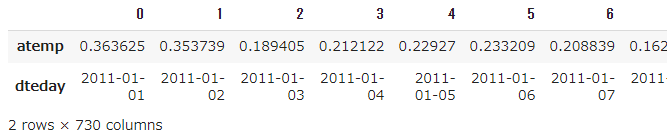

temp.json の内容（抜粋）  
{"0":{"atemp":0.363625,"dteday":"2011-01-01","hum":0.805833,"temp":0.344167,"windspeed":0.160446},  
 "1":{"atemp":0.353739,"dteday":"2011-01-02","hum":0.696087,"temp":0.363478,"windspeed":0.248539},  
 "2":{"atemp":0.189405,"dteday":"2011-01-03","hum":0.437273,"temp":0.196364,"windspeed":0.248309},  
 ...
}


## 行と列を反転する

df**.T**  
行と列を反転することを「転置」と呼ぶ

参考箇所  
コード10-6 行と列を反転させる(P356)

穴埋めコード3

In [ ]:
# 上記で読み込んだtempを転置し、先頭5行を表示する
temp.T.head()

,atemp,dteday,hum,temp,windspeed
0,0.363625,2011-01-01,0.805833,0.344167,0.160446
1,0.353739,2011-01-02,0.696087,0.363478,0.248539
2,0.189405,2011-01-03,0.437273,0.196364,0.248309
3,0.212122,2011-01-04,0.590435,0.2,0.160296
4,0.22927,2011-01-05,0.436957,0.226957,0.1869
...,...,...,...,...,...
725,0.226642,2012-12-27,0.652917,0.254167,0.350133
726,0.255046,2012-12-28,0.59,0.253333,0.155471
727,0.2424,2012-12-29,0.752917,0.253333,0.124383
728,0.2317,2012-12-30,0.483333,0.255833,0.350754


▶実行結果  
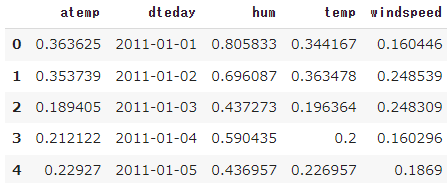

## データフレームを内部結合・外部結合する

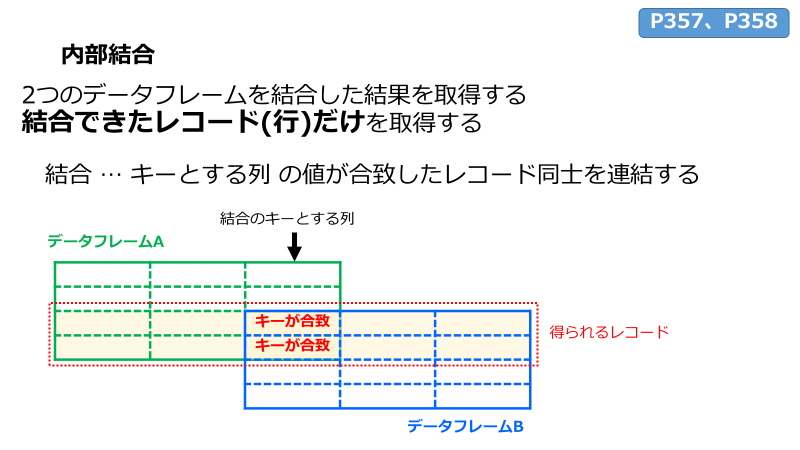

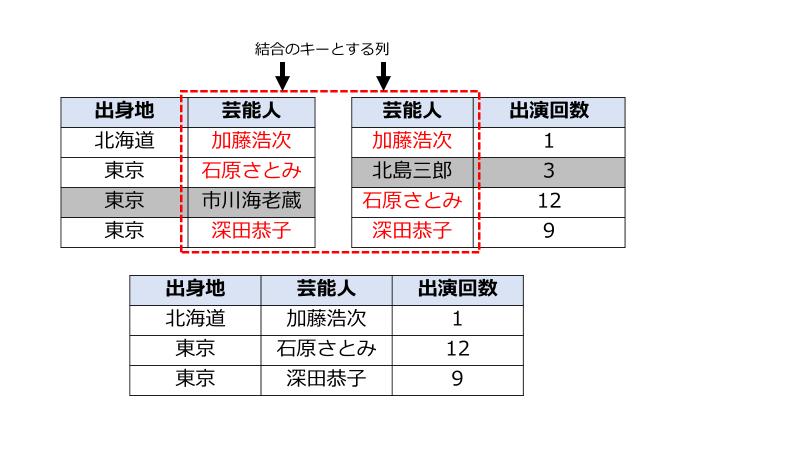

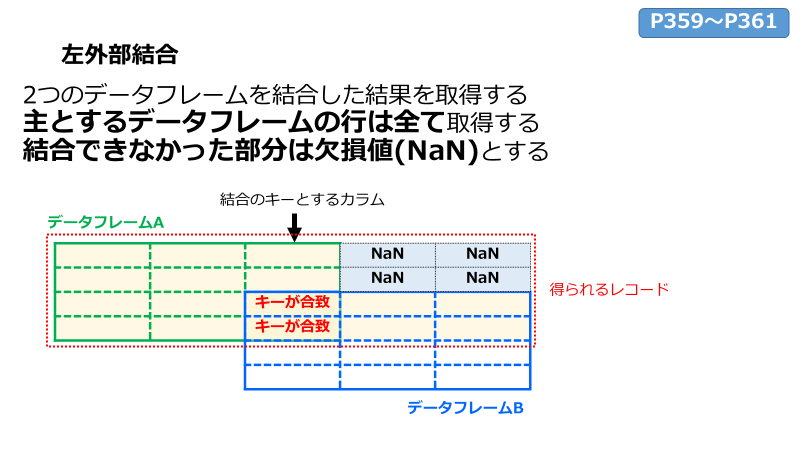

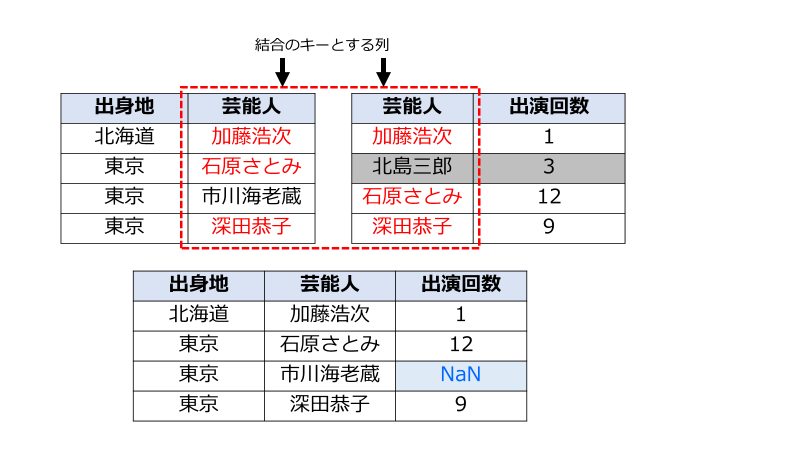

**データフレーム1.merge(データフレーム2, how = ●, on = ▲)**  
**how**
* 'inner'(デフォルト) … 内部結合
* 'left' … 左外部結合

**on**  
結合のキーとする列名

参考箇所  
コード10-7 内部結合を行う(P358)  
コード10-11 merge関数で外部結合を行う(P361)

穴埋めコード4

(1)実装済み

In [ ]:
# データフレームAの作成
df_a = pd.DataFrame(
    [[11, 12, 13],
     [21, 22, 23],
     [31, 32, 33]],
     columns = ['col1','col2','col3'])
df_a

,col1,col2,col3
0,11,12,13
1,21,22,23
2,31,32,33


▶実行結果  
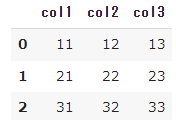

(2)実装済み

In [ ]:
# データフレームBの作成
df_b = pd.DataFrame(
    [[13, 'a'],
     [33, 'c'],
     [43, 'd']],
     columns = ['col3','col4'])
df_b

,col3,col4
0,13,a
1,33,c
2,43,d


▶実行結果  
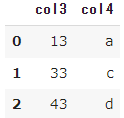

(3)

In [ ]:
# データフレームAとデータフレームBを、キーを'col3'として内部結合した結果を表示する
df_a.merge(df_b, how = 'inner', on = 'col3')

,col1,col2,col3,col4
0,11,12,13,a
1,31,32,33,c


▶実行結果  
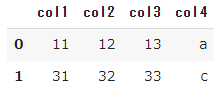

(4)

In [ ]:
# データフレームAとデータフレームBを、キーを'col3'として左外部結合した結果を表示する
df_a.merge(df_b, how = 'left', on = 'col3')

,col1,col2,col3,col4
0,11,12,13,a
1,21,22,23,NaN
2,31,32,33,c


▶実行結果  
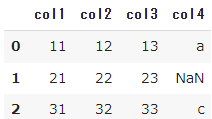

キーとする列には複数列を指定することもできます

(5)実装済み

In [ ]:
# データフレームCの作成
df_c = pd.DataFrame(
    [[12, 13, 'a'],
     [22, 23, 'b'],
     [22, 99, 'x'],
     [99, 23, 'y']],
     columns = ['col2', 'col3','col4'])
df_c

,col2,col3,col4
0,12,13,a
1,22,23,b
2,22,99,x
3,99,23,y


▶実行結果  
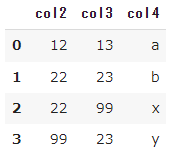

(6)

In [ ]:
# データフレームAとデータフレームCを、キーを'col2'と'col3'の2つの列として左外部結合した結果を表示する
df_a.merge(df_c, how = 'left', on = ['col2', 'col3'])

# データフレームAとデータフレームCを、キーを'col2'と'col3'の2つの列として内部結合した結果を表示する
df_a.merge(df_c, how='inner', on=['col2','col3'])

,col1,col2,col3,col4
0,11,12,13,a
1,21,22,23,b
2,31,32,33,NaN


▶実行結果  
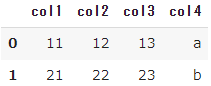

# 10.2 より高度な欠損値の処理  

## 折れ線グラフ、ヒストグラムを作成する

df[列名].plot(kind=●, **alpha**=▲)

* 列名を複数指定することもできる。  
* 列名を指定しなければ、dfの全ての数値列でグラフを作成する。  
* df[列名].loc[■].plot( … ) のようにloc機能と組み合わせれば、データの一部分をグラフにすることができる

**kind**  
* **'line'(デフォルト)** … 折れ線グラフ
* **'hist'** … ヒストグラム

**alpha**  
グラフの透明度(0透明～1不透明)


参考箇所  
コード10-12 気温に関する折れ線グラフを作成する(P364)  
コード10-13 temp列とhum列を折れ線グラフにして比較する(P364)  
コード10-14 plotメソッドでヒストグラムを作成する(P365)  
コード10-15 欠損値付近の折れ線グラフを作成する(P366)

穴埋めコード5

(1)

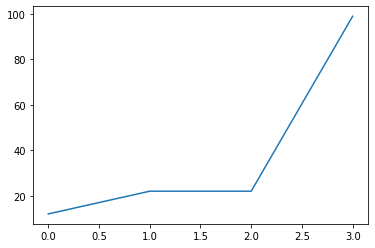

In [ ]:
# セルに図を描画できるようにする設定
%matplotlib inline

# df_cの'col2'を折れ線グラフで表示する。透明度を1とする。
df_c['col2'].plot(kind = 'line', alpha = 1)

▶実行結果  
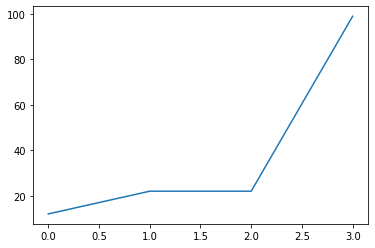

(2)

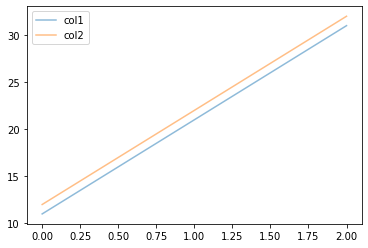

In [ ]:
# df_aの'col1'と'col2'を折れ線グラフで表示する。透明度を0.5とする。
df_a[['col1', 'col2']].plot(kind='line', alpha=0.5)

▶実行結果  
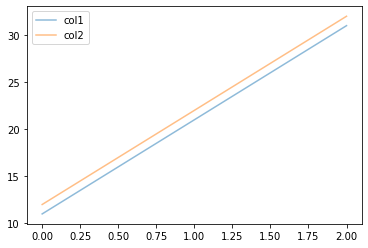

(3)実装済み

In [ ]:
# bike.csvを読み込む
df_bike = pd.read_csv('bike.tsv', sep='\t')

# weather.csvを読み込む
df_weather = pd.read_csv('weather.csv', encoding='shift-jis')

# temp.jsonを読み込む
df_temp = pd.read_json('temp.json')

# df_tempを転置する
df_temp = df_temp.T

# df_weatherとdf_tempを外部結合する
df2 = df_bike.merge(df_weather, how='inner', on='weather_id')
df3 = df2.merge(df_temp, how='left', on='dteday')

(4)

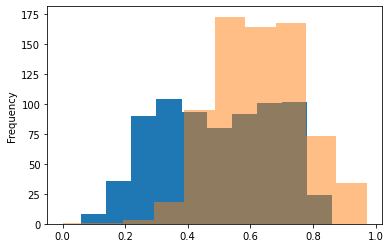

In [ ]:
# df3のtemp列のヒストグラムを表示する。透明度は1(デフォルト)とする。
df3["temp"].plot(kind = 'hist', alpha = 1)


# df3のhum列のヒストグラムを表示する。透明度は0.5とする。
df3["hum"].plot(kind = 'hist', alpha = 0.5)

▶実行結果  
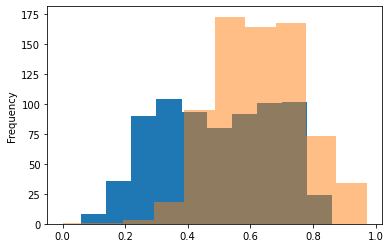

(5)

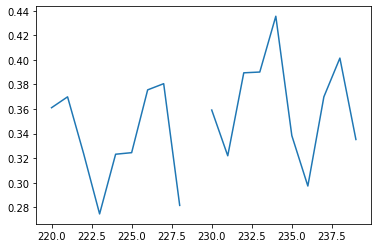

In [ ]:
# df3のatemp列からインデックス220行目から240行目を抜き出し、折れ線グラフを表示する
df3['atemp'].iloc[220:240].plot(kind = 'line')

▶実行結果  
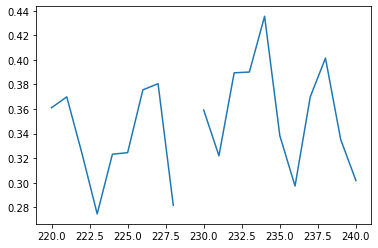

## 欠損値を線形補間する

df[列名]**.interpolate()**

前後のデータから欠損値を穴埋めする。  
※列の型によって補完方法が異なり、**float型なら線形補間ができる**。  

前後と直線的なつながりのあるデータであれば、欠損値を平均値などよりも適切な値で穴埋めできる


**データフレームの各列の型を確認する**  
df**.types**

In [ ]:
# データフレームの各列の型を確認する
# atemp列はobject型であることが分かる
df3.dtypes

dteday        object
holiday        int64
weekday        int64
workingday     int64
weather_id     int64
cnt            int64
weather       object
atemp         object
hum           object
temp          object
windspeed     object
dtype: object

データ型を変換する  
df[列名]**.astype(データ型名)**

* データ型名 … int、float、str、boolなどを指定できる

穴埋めコード6

参考箇所  
コード10-16 欠損値を線形補間する(P367)

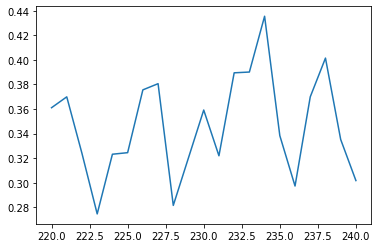

In [ ]:
# df3のatemp列をfloat型に変換し、df3のatemp列に代入し直す
df3['atemp'] = df3['atemp'].astype(float)


# df3のatemp列を線形補間して、df3のatemp列に代入し直す
df3['atemp'] = df3['atemp'].interpolate()

# df3のatemp列からインデックス220行目から240行目を抜き出し、折れ線グラフを表示すると、欠損値が埋まっていることが分かる
df3['atemp'].loc[220:240].plot(kind='line')

▶実行結果  
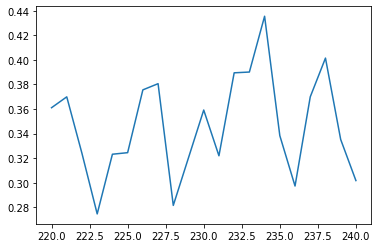

## 教師あり学習で保管する

欠損値のある列を正解データとして予測するモデルを作成し、そのモデルを使って欠損値を穴埋めするというアイデアもある

# 10.3 より高度な外れ値の処理

## マハラノビス距離で外れ値を決める

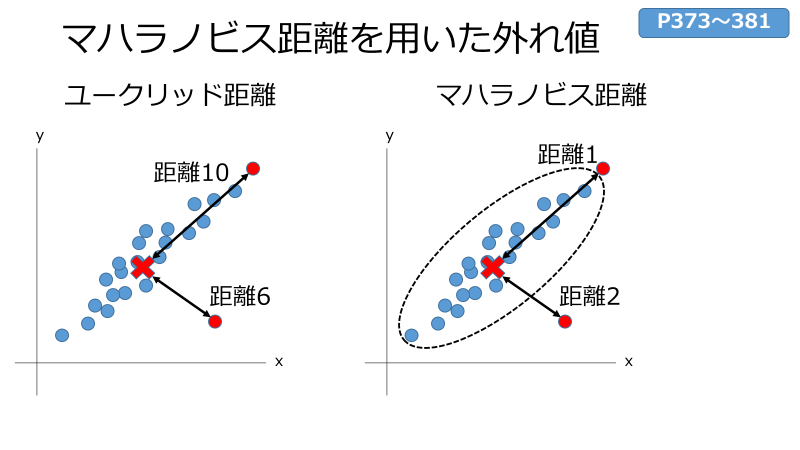

コード10-19 自転車データでマハラノビス距離を計算(P376)

In [ ]:
# MinCovDetのインポート
from sklearn.covariance import MinCovDet

# df3の数値列'atemp'～'windspeed'を取り出し、df4に代入する
df4 = df3.loc[:, 'atemp':'windspeed']

# df4のデータのマハラノビス距離を計算するため、欠損値を削除する
df4 = df4.dropna()

# マハラノビス距離の計算で使うMinCovDetオブジェクトの生成
mcd = MinCovDet(random_state=0, support_fraction=0.7)

# df4の情報を抽出させる
mcd.fit(df4)

# df4のマハラノビス距離を計算し、結果をdistanceに代入する
distance = mcd.mahalanobis(df4)

# distanceの内容を表示する
distance

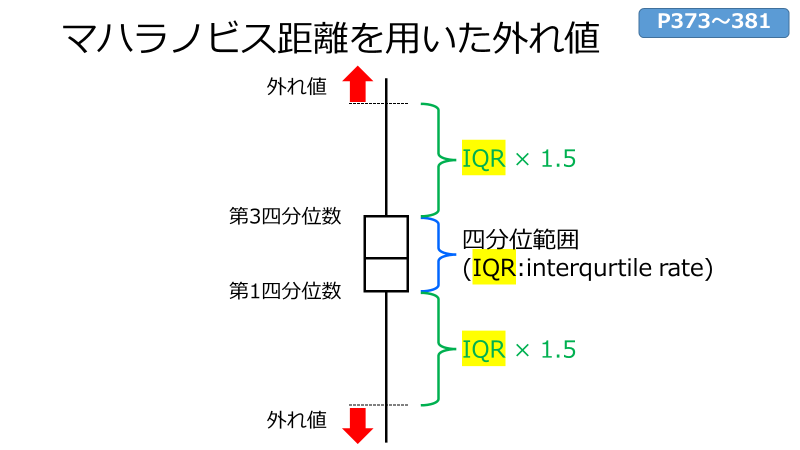

**基本統計量を求める**  
df**.describe()**  
sr**.describe()**

参考箇所  
コード10-21 さまざまな基本統計量を調べる(P380)

In [ ]:
# マハラノビス距離はndarray型のため、describe()は使えない。
# distanceからシリーズのオブジェクトを生成し、sr_distanceに代入する
sr_distance = pd.Series(distance)

# sr_distanceの基本統計量を求め、tmpに代入する
tmp = sr_distance.describe()

# tmpの内容を表示する
tmp

count     730.000000
mean       10.571304
std        98.889470
min         0.183356
25%         2.302019
50%         3.780568
75%         6.517596
max      1918.682293
dtype: float64

参考箇所  
コード10-22 四分位範囲を用いた外れ値の判定(P381)

In [ ]:
#IQRを計算する
IQR = tmp['75%'] -tmp['25%']

# 上限値を計算し、表示する
jougen = tmp['75%'] + 1.5 * IQR 
print('上限',jougen)

# 下限値を計算し、表示する
kagen = tmp['25%'] - 1.5 * IQR 
print('下限',kagen)

# sr_distance(マハラノビス距離)から、上限よりも大きいもの、下限よりも小さいものを抽出し、outlinerに代入する
outlier = sr_distance[ (sr_distance > jougen) | (sr_distance < kagen) ]

# outlierの内容を表示する
print('外れ値')
print(outlier)

上限 12.840961763048222
下限 -4.021346308028695
外れ値
24       16.904765
40     1918.682293
73       55.357957
81       15.463534
84       18.971056
91       23.001774
92       45.588676
94       15.758195
96       13.702627
130      12.903433
131      13.343114
147      14.180961
203      18.506569
218      14.180812
240      14.623922
243      22.325451
251      30.503908
253      17.347400
254      18.559749
257      23.277609
259      14.843623
264      13.075809
267      21.425291
272      14.908148
277      32.693499
286      16.683825
293      13.484822
375      13.154613
424      16.419222
473      14.412725
474      30.488845
480      18.619394
484      21.011948
497      38.434241
506      27.044165
515      24.183972
536      13.034591
544      13.592724
629    1867.324064
691      21.181155
706      24.551635
708      18.009731
709      20.933194
710      25.115724
711      14.380396
712      13.419876
713      12.949065
714      14.051767
715      27.473939
718      30.054611
72

# グラフを保存する

pyplotのインポート  
**import matplotlib.pyplot as plt**

保存  
**plt.savefig(ファイル名)**


穴埋めコード7

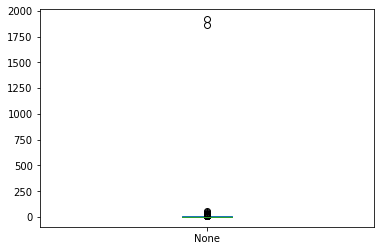

In [ ]:
# pyplotのインポート
import matplotlib.pyplot as plt

# グラフを描画
distance=pd.Series(distance)
distance.plot(kind="box")

# グラフ画像を'test0.jpg'というファイル名で保存する
plt.savefig('test0.jpg')